In [1]:
# Imports
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Constants
NSHARDS = 10
RESULTS_DIR = '/tmp/mwe'
LOCALDIR = '/tmp'

ENCODERS = ['GCN', 'GAT', 'GIN']
TRAINING_SCHEMES = ['JL', 'PF', 'URL']
# SSL_METHODS = ['SUBGCON', 'GraphInfoClust','DeepGraphInfomax','MERIT', 'GBT', 'SelfGNNPPR', 'BGRL','GCA', 'PairwiseAttrSim', 'CentralityScoreRanking', 'AttributeMask']
SSL_METHODS = ['AttributeMask']

METRIC = 'test_rocauc_ovr'

In [3]:
dfs = []
for shard_idx in range(NSHARDS):
  filename = 'results.ndjson-%s-of-%s' % (str(shard_idx).zfill(5), str(NSHARDS).zfill(5))

  with open(f'{RESULTS_DIR}/{filename}', 'r') as f:
    lines = f.readlines()
    records = map(json.loads, lines)
    dfs.append(pd.DataFrame.from_records(records))

# Construct df and remove nans
results_df = pd.concat(dfs)
results_df.drop(['marginal_param', 'fixed_params'], axis=1, inplace=True)
results_df.dropna(axis=0, inplace=True)
del dfs

In [4]:
def get_cells(dataframe: pd.DataFrame, encoder:str = "", ssl_method:str = "", training_scheme:str = "", other:str = ""):
    cols = [col for col in dataframe if (encoder in col and ssl_method in col 
                                         and training_scheme in col and other in col)]
    return dataframe[cols]
    

In [5]:
def plot_learning_curve(df: pd.DataFrame, training_scheme:str, encoder:str, ssl_method:str):
    metrics = ["pretext_losses", "downstream_train_losses", "downstream_val_losses", "downstream_val_tuning_metrics"]
    colors = ["r","g","b","purple"]
    fig, axes = plt.subplots(1, 4, figsize=(15, 2))
    for idx, m in enumerate(metrics):
        cell = get_cells(df, encoder=encoder, training_scheme=training_scheme, other=m).iloc[0,0]
        axes[idx].plot(cell, label=f'{encoder}_{ssl_method}_{training_scheme}_{m}', c=colors[idx])
        
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
    fig.show()

IndexError: single positional indexer is out-of-bounds

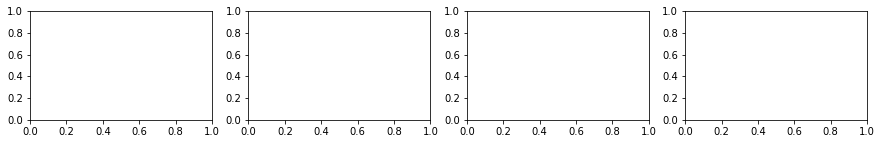

In [6]:
for ts in TRAINING_SCHEMES:
    plot_learning_curve(df = results_df, training_scheme = ts, encoder="GCN", ssl_method=SSL_METHODS[0])


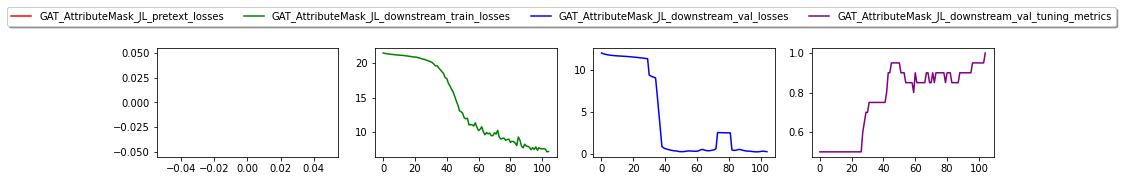

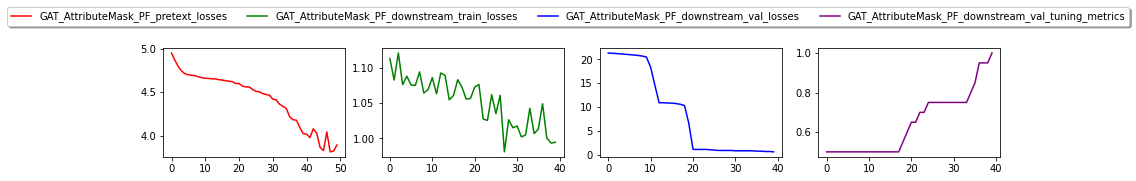

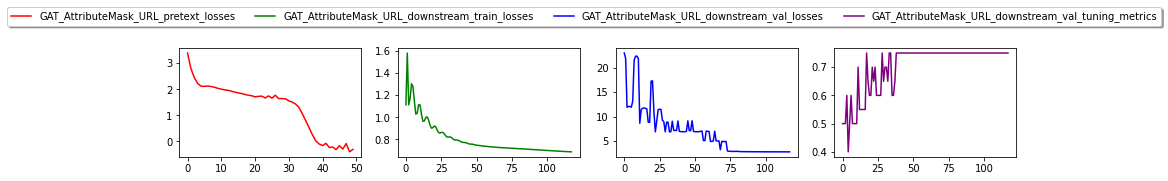

In [7]:
for ts in TRAINING_SCHEMES:
    plot_learning_curve(df = results_df, training_scheme = ts, encoder="GAT", ssl_method=SSL_METHODS[0])

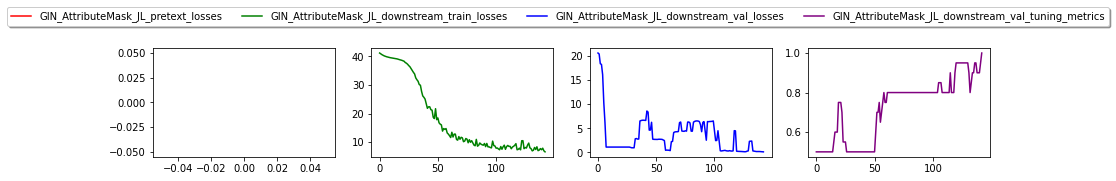

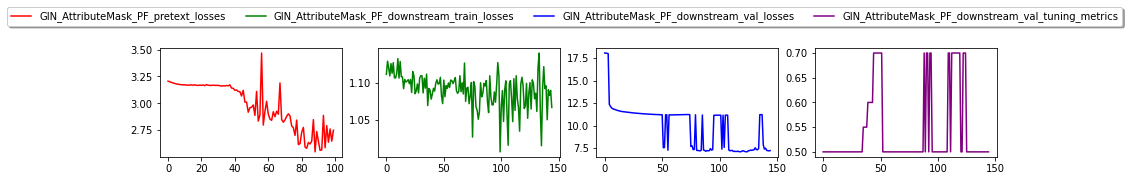

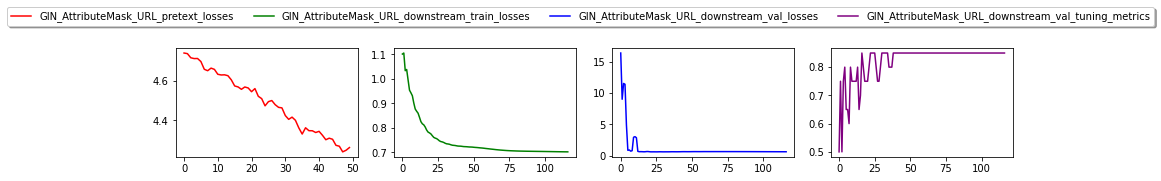

In [8]:
for ts in TRAINING_SCHEMES:
    plot_learning_curve(df = results_df, training_scheme = ts, encoder="GIN", ssl_method=SSL_METHODS[0])